In [11]:
import sys
sys.path.append('/Users/Sabatini Lab/GitHub/mouse_bandit/data_preprocessing_code')
sys.path.append('/Users/Sabatini Lab/GitHub/mouse_bandit')
import support_functions as sf
import numpy as np
import pandas as pd
import scipy as sp
import bandit_preprocessing as bp
import sys
import os
import behavior_database
import matplotlib
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

## load in database (mike only)

In [12]:
record = pd.read_csv('/Users/Sabatini Lab/GitHub/mouse_bandit/mike_session_record.csv',index_col=0)

In [13]:
record.shape

(374, 18)

In [14]:
record.tail(10)

,Owner,Session ID,Mouse ID,Date,Phase,Laser Stim Prob,Left Reward Prob,Right Reward Prob,Block Range Min,Block Range Max,No. Trials,No. Blocks,No. Rewards,p(high Port),Decision Window Duration,Min Inter-trial-interval,Left Solenoid Duration,Right Solenoid Duration
1165,mike,08182017_SOM40,SOM40,2017-08-18 00:00:00,1,0.0,1.0,1.0,1000,1000,5,0,5,0.00,15,1.0,50,50
1166,mike,08182017_SOM41,SOM41,2017-08-18 00:00:00,2,0.0,0.9,0.1,50,50,485,7,397,0.88,2,1.0,40,40
1167,mike,08182017_SOM44,SOM44,2017-08-18 00:00:00,2,0.0,0.9,0.1,50,50,293,4,235,0.87,2,1.0,40,40
1168,mike,08182017_SOM45,SOM45,2017-08-18 00:00:00,2,0.0,0.9,0.1,50,50,636,9,490,0.84,2,1.0,40,40
1169,mike,08212017_PV27,PV27,2017-08-21 00:00:00,2,0.0,0.9,0.1,50,50,99,1,59,0.61,5,1.0,45,45
1170,mike,08212017_PV31,PV31,2017-08-21 00:00:00,1,0.0,0.0,0.0,50,50,69,1,50,0.00,10,1.0,50,50
1171,mike,08212017_SOM40,SOM40,2017-08-21 00:00:00,1,0.0,1.0,1.0,1000,1000,2,0,2,0.00,15,1.0,40,40
1172,mike,08212017_SOM41,SOM41,2017-08-21 00:00:00,2,0.1,0.9,0.1,50,50,292,2,145,0.49,2,1.0,40,40
1173,mike,08212017_SOM44,SOM44,2017-08-21 00:00:00,2,0.1,0.9,0.1,50,50,262,3,156,0.63,2,1.0,40,40
1174,mike,08212017_SOM45,SOM45,2017-08-21 00:00:00,2,0.1,0.9,0.1,50,50,565,8,406,0.77,2,1.0,40,40


In [15]:
record['Mouse ID'].unique()
                                    


array(['PV25', 'PV29', 'SOM39', 'SOM42', 'SOM44', 'SOM45', 'PV30', 'SOM41',
       'PV27', 'SOM40', 'PV31'], dtype=object)

##Extract sessions

In [16]:
SOM45 = record[((record['Mouse ID']=='SOM45') & (record['p(high Port)'] > 0))].copy()
SOM44 = record[((record['Mouse ID']=='SOM44') & (record['p(high Port)'] > 0))].copy()
#SOM42 = record[((record['Mouse ID']=='SOM42') & (record['p(high Port)'] > 0))].copy()
PV27 = record[((record['Mouse ID']=='PV27') & (record['p(high Port)'] > 0))].copy()
#PV30 = record[((record['Mouse ID']=='PV30') & (record['p(high Port)'] > 0))].copy()
SOM41 = record[((record['Mouse ID']=='SOM41') & (record['p(high Port)'] > 0))].copy()
PV31 = record[((record['Mouse ID']=='PV31') & (record['p(high Port)'] > 0))].copy()
SOM40 = record[((record['Mouse ID']=='SOM40') & (record['p(high Port)'] > 0))].copy()

mice = [SOM45,SOM44,SOM41,PV27,PV31,SOM40]

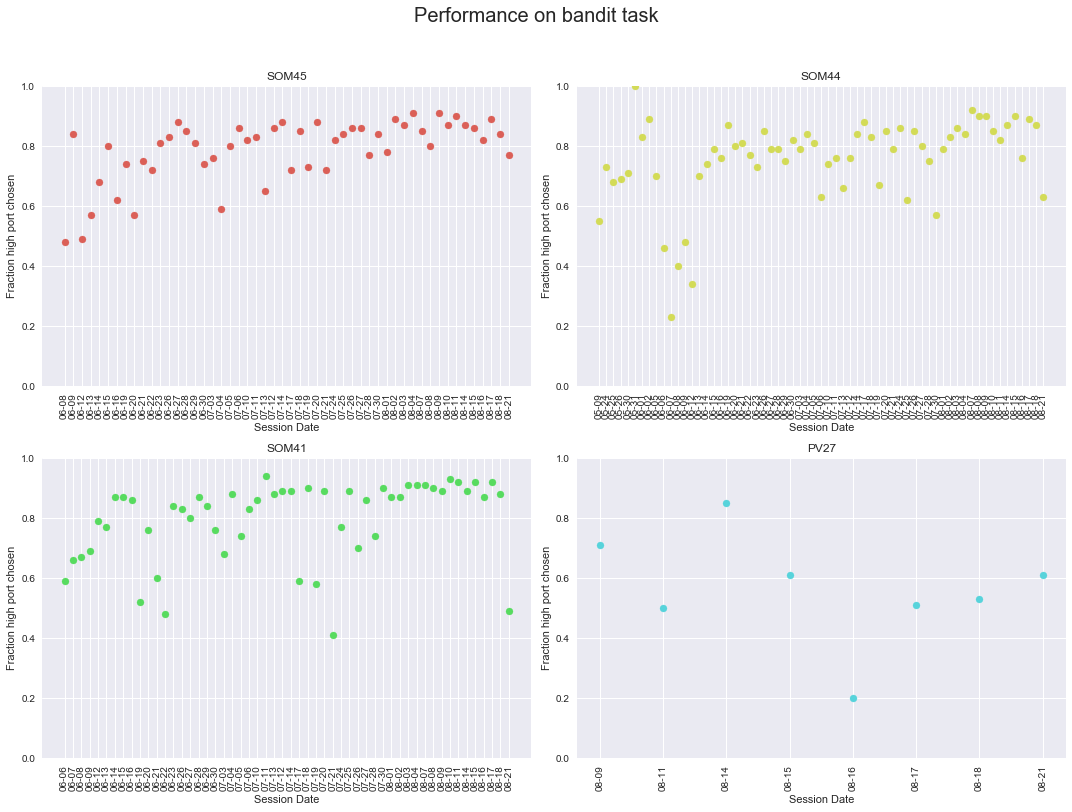

In [17]:
colorz = sns.color_palette('hls',n_colors=6)
fig = plt.figure(figsize=(15,15))
plt.suptitle('Performance on bandit task',x=0.5,y=1.05,fontsize=20)

for i,mouse in enumerate(mice):

    if not len(mouse) == 0:    
        #extract the dates
        dates = []
        for date in mouse['Date'].values:
            dates.append(str(date))

        plt.subplot(3,2,i+1)
        plt.title(mouse['Mouse ID'].values[0])
        plt.scatter(range(mouse.shape[0]),mouse['p(high Port)'].values,color=colorz[i],label=mouse['Mouse ID'].values[0])
        plt.xticks(range(mouse.shape[0]),[date[5:-9] for date in mouse['Date'].values],rotation=90)
        plt.ylim(0,1)
        plt.xlabel('Session Date')
        plt.ylabel('Fraction high port chosen')
        plt.ylim(0,1.0)

plt.tight_layout()

##plot number of rewards consumed

In [18]:
SOM45 = record[((record['Mouse ID']=='SOM45') & (record['No. Rewards'] > 0))].copy()
SOM44 = record[((record['Mouse ID']=='SOM44') & (record['No. Rewards'] > 0))].copy()
#SOM42 = record[((record['Mouse ID']=='SOM42') & (record['No. Rewards'] > 0))].copy()
PV27 = record[((record['Mouse ID']=='PV27') & (record['No. Rewards'] > 0))].copy()
#PV30 = record[((record['Mouse ID']=='PV30') & (record['No. Rewards'] > 0))].copy()
SOM41 = record[((record['Mouse ID']=='SOM41') & (record['No. Rewards'] > 0))].copy()
PV31 = record[((record['Mouse ID']=='PV31') & (record['No. Rewards'] > 0))].copy()
SOM40 = record[((record['Mouse ID']=='SOM40') & (record['No. Rewards'] > 0))].copy()

mice = [SOM45,SOM44,SOM41,PV27,PV31,SOM40]

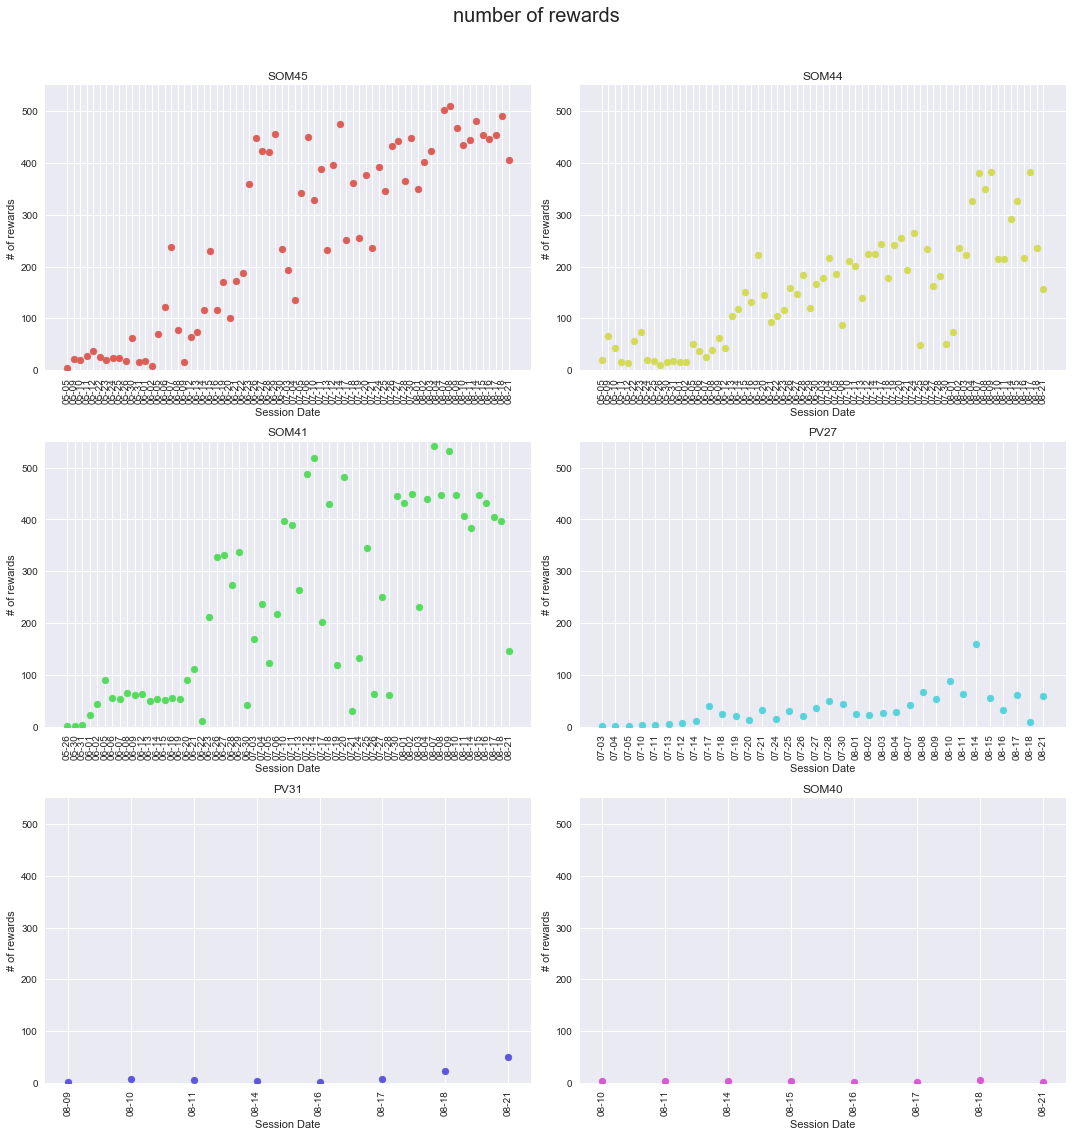

In [19]:
colorz = sns.color_palette('hls',n_colors=6)
fig = plt.figure(figsize=(15,15))
plt.suptitle('number of rewards',x=0.5,y=1.05,fontsize=20)

for i,mouse in enumerate(mice):

    if not len(mouse) == 0:    
        #extract the dates
        dates = []
        for date in mouse['Date'].values:
            dates.append(str(date))

        plt.subplot(3,2,i+1)
        plt.title(mouse['Mouse ID'].values[0])
        plt.scatter(range(mouse.shape[0]),mouse['No. Rewards'].values,color=colorz[i],label=mouse['Mouse ID'].values[0])
        plt.xticks(range(mouse.shape[0]),[date[5:-9] for date in mouse['Date'].values],rotation=90)
        plt.ylim(0,550)
        plt.xlabel('Session Date')
        plt.ylabel('# of rewards')
        plt.ylim(0,550)


plt.tight_layout()

